# 1. 准备工作

检测keras型号以及后端，下载数据并且打印数据格式：

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.3'

In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('train images shape:', train_images.shape)
print('test images shape:', test_images.shape)

train images shape: (60000, 28, 28)
test images shape: (10000, 28, 28)


# 2. 网络结构

In [4]:
from keras import models
from keras import layers

# 1.网络结构
network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation = 'softmax'))

# 2.编译
network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


# 3. 数据准备

In [5]:
# 1.准备图片数据
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# 2.准备标签
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 4. 训练

In [6]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.2557 - acc: 0.9259
Epoch 2/5
60000/60000 [==============================] - 1s 12us/step - loss: 0.1040 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 1s 12us/step - loss: 0.0680 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 1s 13us/step - loss: 0.0495 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 1s 12us/step - loss: 0.0369 - acc: 0.9890


# 5. 测试

In [7]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 20us/step


In [8]:
print('test_acc:', test_acc)

test_acc: 0.9792


# 6. 其他测试

## 6.1 显示数字

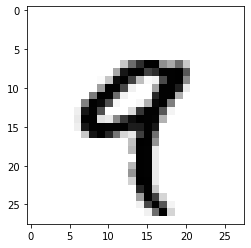

In [25]:
train_images = train_images.reshape(60000, 28, 28)
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

## 6.2 张量切片

In [26]:
# 1. 取第10 ~ 100个数据
data_split1 = train_images[10:100]
print(data_split1.shape)

(90, 28, 28)


(60000, 14, 14)


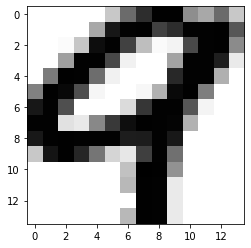

In [29]:
# 2. 取所有数据中的中间区域
data_split2 = train_images[:, 7:-7, 7:-7]
print(data_split2.shape)

digit1 = data_split2[4]
plt.imshow(digit1, cmap = plt.cm.binary)
plt.show()